In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '../') # change if needed to get access to LFADS code

In [3]:
from pathlib import Path
import h5py
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
from lfads_sampler.lfads import load_lfads_sampler


In [5]:
# unconditional sampling
sampler = load_lfads_sampler(
    file_path="../../data/samplers/lfads_sampler.pkl", # your path here, run create_unconditional_sampler.py to generate if not already done
    device="cpu",
    seed=0,
)

In [6]:
(spikes, rates, factors, behavior) = sampler.sample_everything(n=16, t=140, include_behavior=True, ext_input=None)

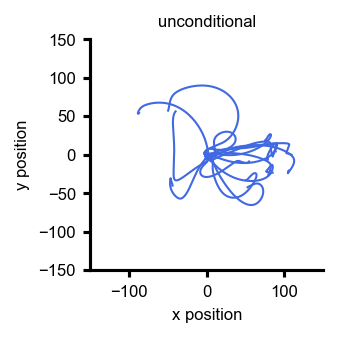

In [7]:
# plot unconditional reaches
with plt.rc_context(fname="../matplotlibrc"):
    fig = plt.figure(figsize=(2,2))
    position = np.cumsum(behavior.detach().cpu().numpy(), axis=1) * 0.005
    for i in range(position.shape[0]):
        plt.plot(position[i,:,0], position[i,:,1], color="royalblue")
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.title('unconditional')
    plt.show()
    plt.close()

In [ ]:
# save unconditional samples
data_dict = {
    "sampled_spikes": spikes.detach().cpu().numpy(),
    "sampled_rates": rates.detach().cpu().numpy(),
    "sampled_latents": factors.detach().cpu().numpy(),
    "sampled_behavior": behavior.detach().cpu().numpy(),
}

import pickle
with open("lfads_samples.pkl", "wb") as f:
    pickle.dump(data_dict, f)


In [5]:
# sampling lorenz
lorenz_sampler = load_lfads_sampler(
    file_path="../../data/samplers/lorenz_lfads_sampler.pkl", # your path here, run create_lorenz_sampler.py to generate if not already done
    device="cpu",
    seed=0,
)

In [6]:
(spikes, rates, factors, behavior) = lorenz_sampler.sample_everything(n=8, t=256 * 16, include_behavior=True, ext_input=None)

In [16]:
data_dict = {
    "sampled_spikes": spikes.detach().cpu().numpy(),
    "sampled_rates": rates.detach().cpu().numpy(),
    "sampled_latents": factors.detach().cpu().numpy(),
    "sampled_lorenz": behavior.detach().cpu().numpy(),
}

import pickle
with open("lorenz_samples.pkl", "wb") as f:
    pickle.dump(data_dict, f)